## Proyecto calidad del aire en Colombia

A lo largo de los años, la contaminación del aire ha sido un desafío ambiental y de salud pública en Colombia. Con datos recopilados entre 2011 y 2022, este estudio analiza su evolución, ciudades o municipios más afectados y la correlación con variables meteorológicas para comprender su impacto a nivel nacional. 

Antes de proceder con el análisis detallado, se llevó a cabo una etapa de exploración y limpieza de los datos en un cuaderno Jupyter separado, donde se identificaron valores duplicados, se unificaron formatos y se verificó la calidad de la información. Este preprocesamiento es fundamental para garantizar resultados precisos y confiables en el presente estudio.

### Selección de departamentos para el estudio

Para garantizar la robustez y representatividad del análisis, en este estudio se trabajará exclusivamente con los departamentos que cuentan con datos completos para el período 2011-2022. La razón principal de esta selección es evitar sesgos en los resultados, dado que ciertos departamentos presentan lagunas significativas en los registros de calidad del aire, lo que podría afectar la comparación de tendencias y la evaluación de correlaciones.

La presencia de datos incompletos en algunos departamentos puede generar inconsistencias al interpretar la evolución de los contaminantes. Además, la falta de mediciones en años específicos dificulta la evaluación del impacto de regulaciones como la Ley 2254/2017, y limita el análisis de relaciones entre contaminantes y variables meteorológicas.

Por lo tanto, en este estudio se han seleccionado únicamente aquellos departamentos cuya información es continua y fiable dentro del período de análisis, lo que garantiza una base de datos más homogénea y adecuada para responder a las preguntas de investigación.

In [2]:
# Importamos nuestros datos limpios previamente manipulados en Proyecto_calidad_del_aire_EDA.ipynb
import pandas as pd
df = pd.read_csv('Calidad_Aire.csv')

# Filtramos los departamentos que tienen la data de los años 2011 a 2022 completos de acuerdo a nuestros hallazgos en SQL

df_dep = df[df['Nombre del Departamento'].isin(['ANTIOQUIA', 'BOYACA', 'CALDAS', 'CESAR', 'CUNDINAMARCA', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 
'QUINDIO', 'RISARALDA', 'SANTANDER', 'TOLIMA', 'VALLE DEL CAUCA'])]

### ¿Cómo han evolucionado los contaminantes en Colombia entre 2011 y 2022?

La calidad del aire en Colombia ha sido objeto de monitoreo y regulación para mitigar sus efectos en la salud y el medio ambiente. En este estudio, **nos centraremos en los contaminantes regulados por la Ley 2254/2017**: el material particulado *PM10* y *PM2.5*, que puede penetrar en el sistema respiratorio y causar efectos adversos; las partículas suspendidas totales (*PST*), que reflejan la contaminación general; el dióxido de nitrógeno (*NO2*), un gas clave en la formación de contaminantes secundarios; y el dióxido de azufre (*SO2*), un compuesto que contribuye a la lluvia ácida y afecta la calidad del aire. Analizar la evolución de estos contaminantes permitirá evaluar la efectividad de la regulación y comprender las tendencias de contaminación en el país.

In [3]:
import plotly.express as px
import pandas as pd

# Filtrar los contaminantes regulados anualmente
contaminantes = ['PM10', 'PM2.5', 'PST', 'NO2', 'SO2']
df_contaminantes = df_dep[df_dep["Variable"].isin(contaminantes)]

# Agrupar por año y contaminante para obtener el promedio nacional
df_agrupado = df_contaminantes.groupby(['Year', 'Variable'])['Promedio'].mean().reset_index()

# Crear gráfico interactivo
fig = px.line(df_agrupado,
              x='Year',
              y='Promedio',
              color='Variable',
              markers=True,
              title='Evolución del Promedio Anual de Contaminantes en Colombia (2011–2022)',
              labels={'Year': 'Año', 'Promedio': 'Concentración (µg/m³)', 'Variable': 'Contaminante'},
              template='plotly_white')

fig.update_layout(legend_title_text='Contaminante')
fig.show()

La gráfica muestra una **caída drástica del contaminante PST desde 2018 y su desaparición después de 2019**, lo cual podría indicar un cambio en la metodología de monitoreo, una reducción efectiva de emisiones, o una modificación en la normativa que afecta su reporte.  

Por otro lado, **los demás contaminantes PM10, PM2.5, NO2 y SO2 mantienen tendencias relativamente estables a lo largo del período 2011-2022**, sin picos extremos. Esto sugiere que, aunque la contaminación persiste, no ha habido incrementos alarmantes ni reducciones abruptas en su concentración.  

Algunas hipótesis a considerar:
- ¿Hubo cambios en la regulación o monitoreo del PST en 2018-2019?
- ¿Las fuentes de emisión de PST disminuyeron significativamente por medidas ambientales o tecnológicas?
- ¿Existe una relación entre las tendencias de material particulado (PM10/PM2.5) y NO2/SO2 en ciertos periodos?

### Evaluar los niveles de contaminación por la ley 2254/2017

La Ley 2254 de 2017 establece regulaciones para la calidad del aire en Colombia, fijando límites permisibles para ciertos contaminantes con el objetivo de proteger la salud pública y el medio ambiente. En este estudio, **evaluaremos si los niveles de PM10, PM2.5, PST, NO2 y SO2 han cumplido con estos estándares a lo largo del período 2011-2022**.

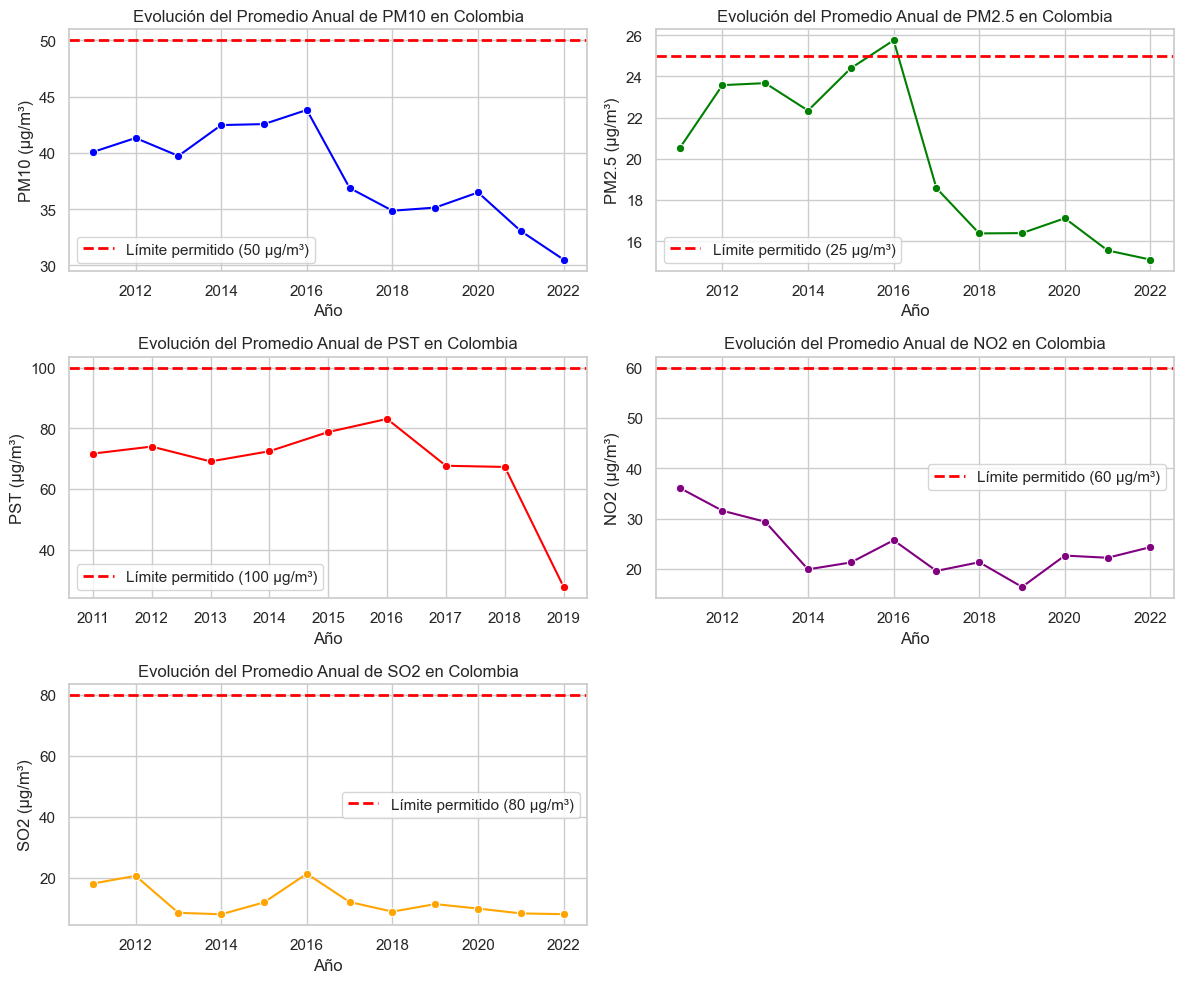

In [4]:
# Evaluamos los niveles de contaminación por la ley 2254/2017

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid") # Configurar estilo de gráficos

# Crear la figura y los subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 filas, 2 columnas
fig.delaxes(axes[2, 1])  # Elimina el último subplot vacío

# Gráfico 1: Evolución de PM10 en Colombia
df_pm10 = df_contaminantes[df_contaminantes["Variable"] == "PM10"].groupby("Year")["Promedio"].mean().reset_index()
sns.lineplot(x="Year", y="Promedio", data=df_pm10, marker="o", color="blue", ax=axes[0, 0])
axes[0, 0].axhline(y=50, color="red", linestyle="--", linewidth=2, label="Límite permitido (50 µg/m³)")
axes[0, 0].set_title("Evolución del Promedio Anual de PM10 en Colombia")
axes[0, 0].set_xlabel("Año")
axes[0, 0].set_ylabel("PM10 (µg/m³)")
axes[0, 0].legend()

# Gráfico 2: Evolución de PM2.5 en Colombia
df_pm25 = df_contaminantes[df_contaminantes["Variable"] == "PM2.5"].groupby("Year")["Promedio"].mean().reset_index()
sns.lineplot(x="Year", y="Promedio", data=df_pm25, marker="o", color="green", ax=axes[0, 1])
axes[0, 1].axhline(y=25, color="red", linestyle="--", linewidth=2, label="Límite permitido (25 µg/m³)")
axes[0, 1].set_title("Evolución del Promedio Anual de PM2.5 en Colombia")
axes[0, 1].set_xlabel("Año")
axes[0, 1].set_ylabel("PM2.5 (µg/m³)")
axes[0, 1].legend()

# Gráfico 3: Evolución de PST en Colombia
df_pst = df_contaminantes[df_contaminantes["Variable"] == "PST"].groupby("Year")["Promedio"].mean().reset_index()
sns.lineplot(x="Year", y="Promedio", data=df_pst, marker="o", color="red", ax=axes[1, 0])
axes[1, 0].axhline(y=100, color="red", linestyle="--", linewidth=2, label="Límite permitido (100 µg/m³)")
axes[1, 0].set_title("Evolución del Promedio Anual de PST en Colombia")
axes[1, 0].set_xlabel("Año")
axes[1, 0].set_ylabel("PST (µg/m³)")
axes[1, 0].legend()

# Gráfico 4: Evolución de NO2 en Colombia
df_no2 = df_contaminantes[df_contaminantes["Variable"] == "NO2"].groupby("Year")["Promedio"].mean().reset_index()
sns.lineplot(x="Year", y="Promedio", data=df_no2, marker="o", color="purple", ax=axes[1, 1])
axes[1, 1].axhline(y=60, color="red", linestyle="--", linewidth=2, label="Límite permitido (60 µg/m³)")
axes[1, 1].set_title("Evolución del Promedio Anual de NO2 en Colombia")
axes[1, 1].set_xlabel("Año")
axes[1, 1].set_ylabel("NO2 (µg/m³)")
axes[1, 1].legend()

# Gráfico 4: Evolución de SO2 en Colombia
df_so2 = df_contaminantes[df_contaminantes["Variable"] == "SO2"].groupby("Year")["Promedio"].mean().reset_index()
sns.lineplot(x="Year", y="Promedio", data=df_so2, marker="o", color="orange", ax=axes[2, 0])
axes[2, 0].axhline(y=80, color="red", linestyle="--", linewidth=2, label="Límite permitido (80 µg/m³)")
axes[2, 0].set_title("Evolución del Promedio Anual de SO2 en Colombia")
axes[2, 0].set_xlabel("Año")
axes[2, 0].set_ylabel("SO2 (µg/m³)")
axes[2, 0].legend()

# Ajustar el diseño
plt.tight_layout()
plt.show()

Los resultados muestran que el nivel de PM2.5 alcanzó un valor crítico en 2016, lo cual evidencia la presencia de un episodio de concentración elevada. Este pico podría estar asociado a condiciones atmosféricas atípicas, cambios en las fuentes emisoras o eventos puntuales que impulsaron un sobrepaso en la concentración de este contaminante.  

Por otro lado, aunque la mayoría de los contaminantes se mantienen por debajo de los límites establecidos por la regulación 2254/2017, es relevante observar que en 2016 se registraron los valores máximos para PM10, PST y SO2, mientras que el NO2 mostró su pico en 2011 y se mantuvo estable posteriormente. La concentración simultánea de PM10, PST y SO2 en 2016 sugiere que pudieron existir factores ambientales o eventos específicos —como cambios en las condiciones climatológicas, variaciones en la actividad industrial o en la movilidad— que afectaron de forma conjunta la emisión y dispersión de estos contaminantes. La estabilidad observada en los niveles de NO2 es alentadora, ya que indica una mejora sostenida o una regulación efectiva de las fuentes emisoras relacionadas, lo cual es positivo desde el punto de vista de la salud pública y la política ambiental.  

En resumen, la observación de un pico excepcional en 2016, especialmente para PM2.5, PM10, PST y SO2, subraya la necesidad e importancia de indagar y analizar las causas de estos picos. Entender los factores detrás de esos episodios críticos puede contribuir a diseñar estrategias más efectivas de mitigación y a refinar las políticas de regulación ambiental en Colombia.

In [5]:
# Hallamos el promedio y mediana de cada contaminante en 2016
prom_2016 = df_contaminantes[df_contaminantes['Year']==2016].groupby('Variable')['Promedio'].mean().reset_index()
med_2016 = df_contaminantes[df_contaminantes['Year']==2016].groupby('Variable')['Mediana'].median().reset_index()

# Unimos promedios y medianas del 2016 por la columna 'Variable'
df_combinado = pd.merge(prom_2016, med_2016, on='Variable', how='inner')

df_combinado

,Variable,Promedio,Mediana
0,NO2,25.694118,22.1
1,PM10,43.808333,37.7
2,PM2.5,25.755263,23.0
3,PST,83.080000,77.8
4,SO2,21.255882,11.0


Dado que los promedios son mayores que la mediana, se deduce que la distribución de los datos está sesgada hacia la derecha, lo que implica la presencia de valores extremos o picos altos que "tiran" la media hacia arriba en ciertos momentos o ubicaciones. Esto podría señalar situaciones de emergencia ambiental o episodios de contaminación aguda. No obstante, el hecho de que la mediana no supere el límite establecido por la regulación 2254 de 2017 indica que, en la mayoría de los registros observados, las concentraciones de contaminantes se mantienen por debajo del umbral crítico diseñado para proteger la salud pública y el medio ambiente. Este hallazgo es alentador, ya que la mediana, al ser una medida robusta que no se ve afectada por valores extremos, refleja de manera más precisa el comportamiento típico de los datos.  

Para profundizar en la identificación de esos episodios atípicos (outliers) que elevan el promedio a pesar de que la mediana se mantenga por debajo del límite, hemos decidido agrupar por departamentos, promedio y percentil 98. Esto con el fin de que el promedio nos ayude a reflejar la exposición anual en terminos generales y el percentil 98 medir los casos extremos dentro del año.

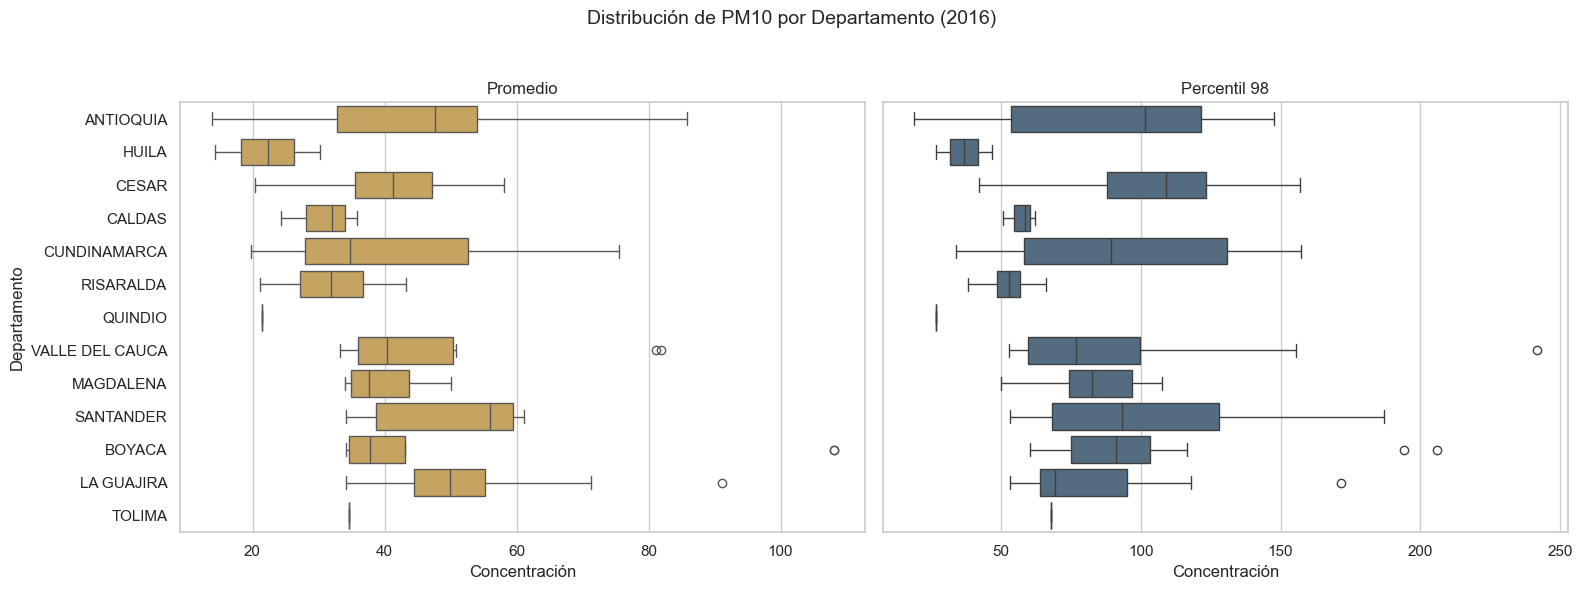

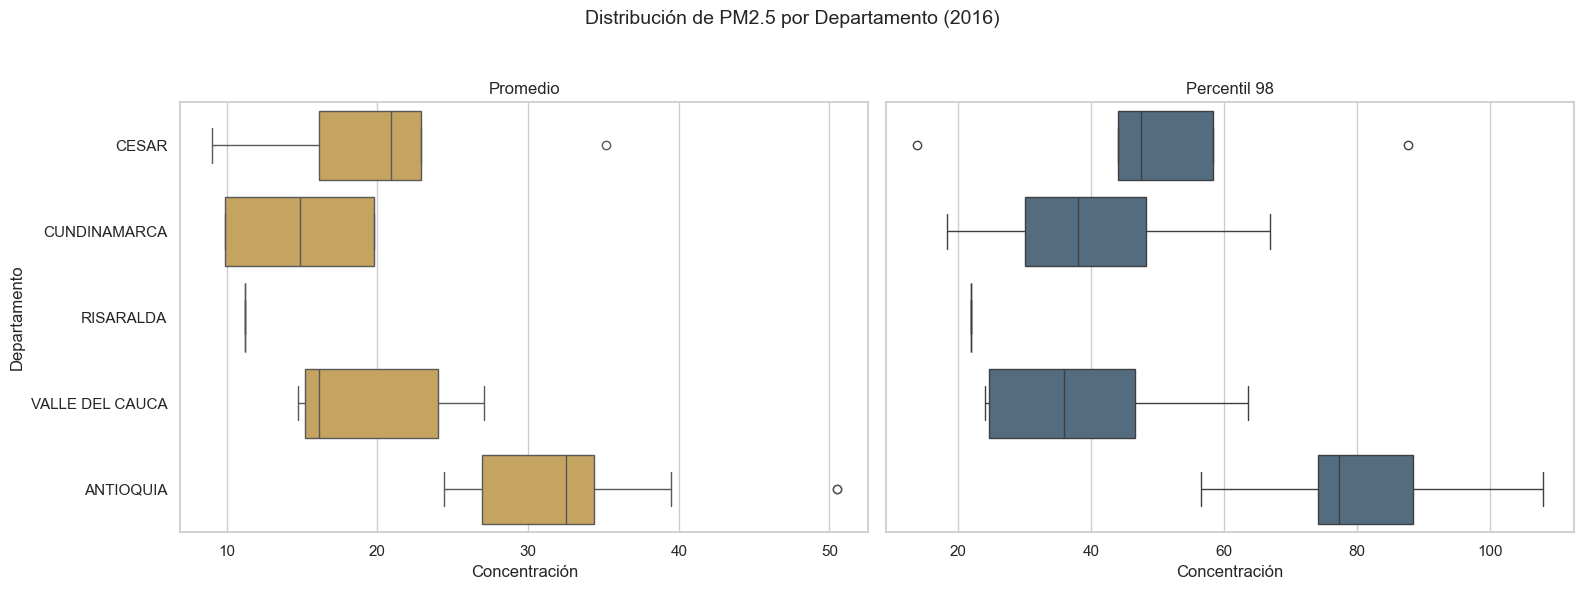

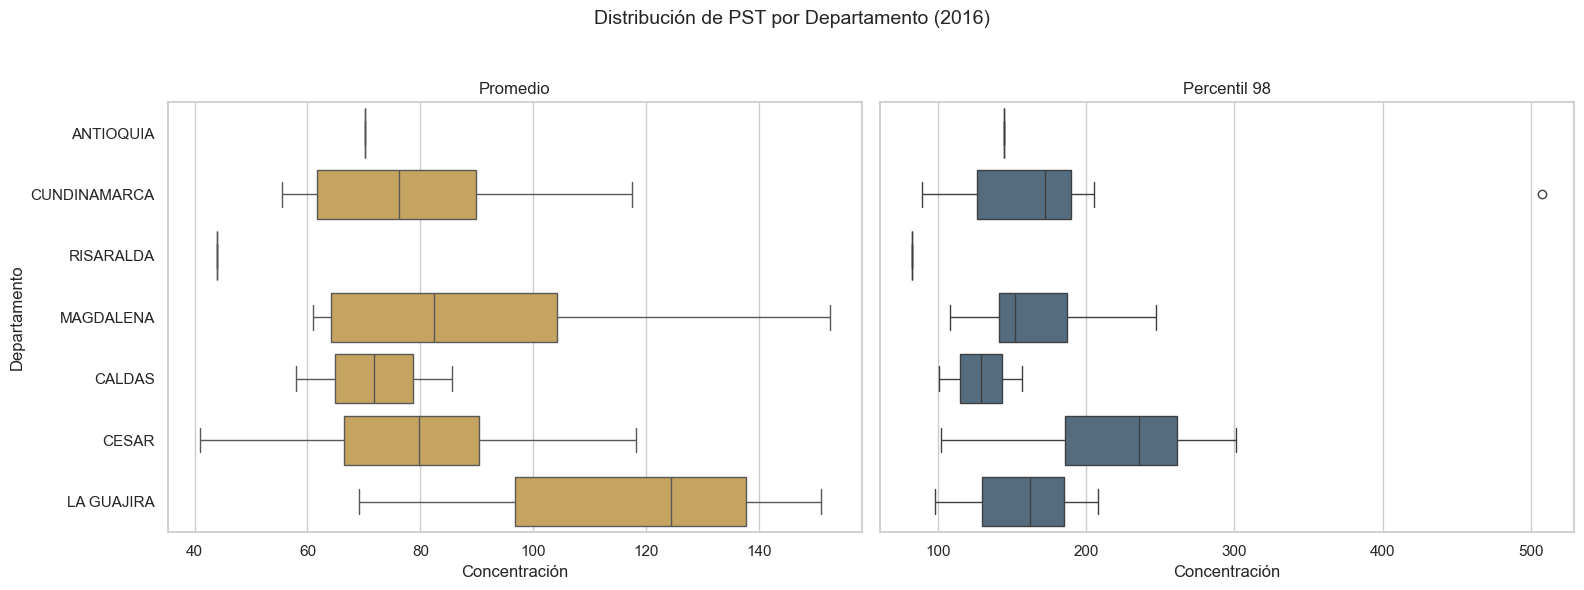

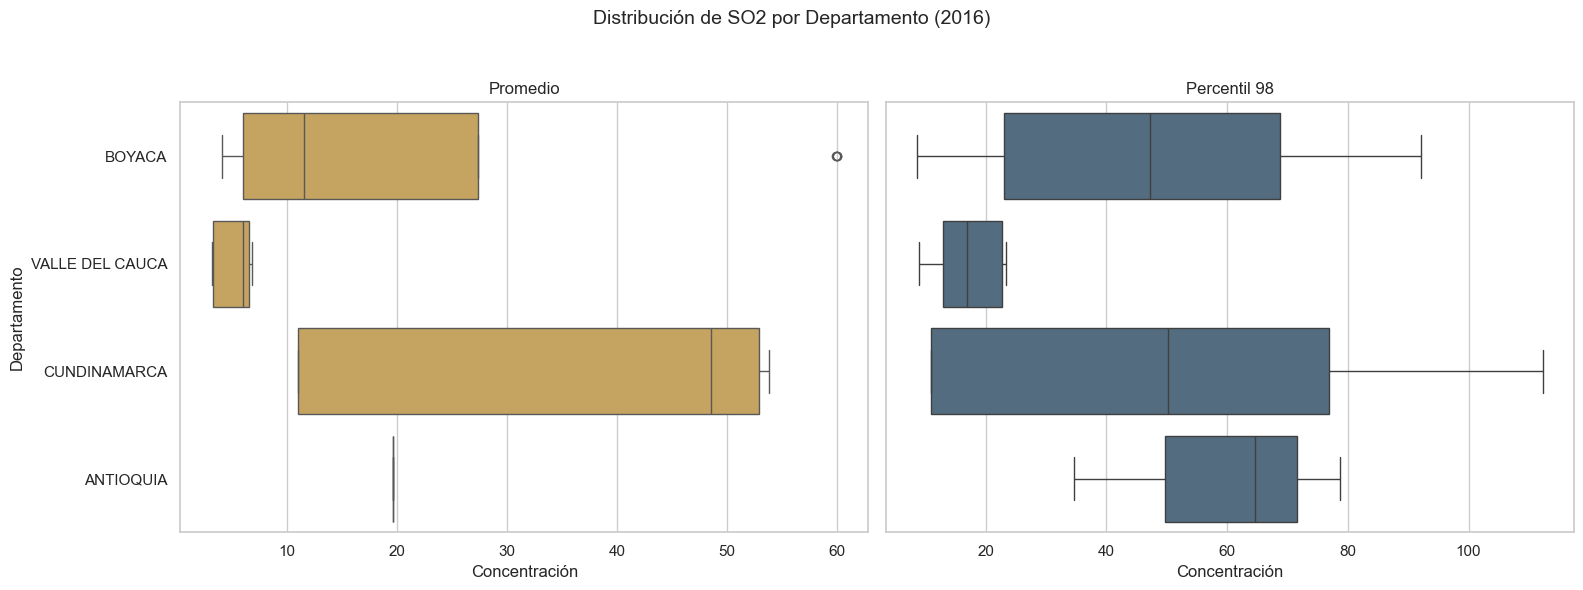

In [6]:
# Evaluación de valores atipicos por departamento en el 2016 
contaminantes_filtrados = [c for c in contaminantes if c != 'NO2']

for cont in contaminantes_filtrados:
    data_2016 = df_contaminantes[(df_contaminantes['Year'] == 2016) & (df_contaminantes['Variable'] == cont)]

    if not data_2016.empty:
        fig, axes = plt.subplots(1, 2, figsize = (16, 6), sharey = True)
        fig.suptitle(f'Distribución de {cont} por Departamento (2016)', fontsize=14)

        # Boxplot del Promedio
        sns.boxplot(y='Nombre del Departamento', x='Promedio', data=data_2016, ax=axes[0], color='#D6A84F')
        axes[0].set_title('Promedio')
        axes[0].set_xlabel('Concentración')
        axes[0].set_ylabel('Departamento')

        # Boxplot del Percentil 98
        sns.boxplot(y='Nombre del Departamento', x='Percentil 98', data=data_2016, ax=axes[1], color='#4B6D88')
        axes[1].set_title('Percentil 98')
        axes[1].set_xlabel('Concentración')
        axes[1].set_ylabel('') 

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

De acuerdo a las graficas anteriores, podemos obtener las siguientes conclusiones del análisis de contaminantes atmosféricos (2016)  

- **Presencia de eventos extremos en PM10**:  
Los departamentos de La Guajira, Boyacá y Valle del Cauca muestran concentraciones notablemente elevadas de PM10 tanto en los promedios anuales como en los percentiles 98. Esto sugiere que, además de mantener niveles consistentemente altos, también enfrentan episodios agudos de contaminación, lo cual podría representar un riesgo considerable para la salud pública en esos territorios, en el año indicado.  

- **PM2.5 con variabilidad moderada y casos puntuales de alerta**:  
El Cesar y Antioquia presentan valores por encima del promedio esperado en PM2.5. Aunque las concentraciones extremas en Cesar muestran rangos dispares, resalta la necesidad de estudiar la estacionalidad o episodios puntuales que podrían estar elevando los niveles.  

- **PST con comportamientos estables, salvo una excepción importante**:  
En general, los niveles promedio de PST no presentan outliers, lo que indica una estabilidad relativa. Sin embargo, el valor extremo de 501 µg/m³ en el percentil 98 en Cundinamarca constituye una señal de alarma que requiere investigación específica sobre su causa (por ejemplo, actividad industrial, incendios, o condiciones meteorológicas excepcionales).  

- **SO2 con impacto localizado en Boyacá**:  
Aunque la mayoría de los departamentos no presentan niveles alarmantes, Boyacá destaca con un valor atípico de 60 µg/m³ en su promedio anual, lo que podría estar asociado con actividades industriales o uso de combustibles fósiles. La ausencia de valores extremos en el percentil 98 sugiere que se trata de una exposición sostenida más que de picos puntuales.  

Aunque en 2016 se registraron los picos más altos de PST, SO2, PM10 y PM2.5, los departamentos afectados no coincidieron entre sí, lo que indica que las causas de estos aumentos varían según el tipo de contaminante.

In [7]:
# Verificamos que municipio o municipios aportarón a los niveles alarmantes de PM10 en La Guajira, Boyacá y Valle del Cauca en 2016
PM10_mun_2016 = df_contaminantes[
    (df_contaminantes['Variable']=='PM10') & 
     (df_contaminantes['Year']==2016)
      ].groupby(['Nombre del Departamento','Nombre del Municipio'])[['Promedio','Percentil 98']].max().reset_index().sort_values(by='Percentil 98', 
                                                                                                                     ascending=False)

PM10_mun_2016[(PM10_mun_2016['Percentil 98'] > 150) & (PM10_mun_2016['Promedio'] > 80)]

,Nombre del Departamento,Nombre del Municipio,Promedio,Percentil 98
61,VALLE DEL CAUCA,YUMBO,81.9,241.7
25,BOYACA,RAQUIRA,108.1,206.0
46,LA GUAJIRA,BARRANCAS,91.2,171.7


El boxplot de PM10 para 2016 revela un impacto localizado en los departamentos de Boyacá, Valle del Cauca y La Guajira. Al filtrar los datos por cada departamento y agrupar por municipio, se identificaron tres zonas con los niveles más altos: Yumbo (Valle del Cauca), Ráquira (Boyacá) y Barrancas (La Guajira). Este resultado concuerda con antecedentes bien documentados sobre las fuentes de emisión presentes en cada una de estas localidades.  

En Yumbo, considerado la capital industrial del Valle del Cauca, se concentra una alta densidad de empresas del sector Acopi. Las principales fuentes de PM10 en la zona han sido relacionadas con la quema de combustibles fósiles, procesos industriales, canteras y actividades de construcción, según [reporte en Semana](https://www.semana.com/medio-ambiente/articulo/en-el-valle-la-contaminacion-es-hecha-en-yumbo/38652/)  

Ráquira, en Boyacá, es reconocida por su producción artesanal de cerámica y alfarería. De acuerdo con un estudio realizado en 2016 por la Universidad El Bosque, los hornos de carbón utilizados en el proceso de cocción de artesanías representan una fuente significativa de emisión de partículas PM10, lo que repercute directamente en la calidad del aire local. [Ver investigación completa](https://repositorio.unbosque.edu.co/server/api/core/bitstreams/d7e00948-c2c7-4ec1-b990-8a0aa8090a7e/content)  

En Barrancas, La Guajira, la presencia de minería de carbón a cielo abierto, en particular por su cercanía al complejo minero El Cerrejón, ha sido identificada como la principal fuente de partículas en suspensión. La combinación de la actividad minera,  el clima seco y los fuertes vientos contribuyen a elevados niveles de PM10 en la atmósfera. [Ver tesis completa](https://bibliotecadigital.udea.edu.co/entities/publication/aa3a30ad-bd10-4d1e-b9f3-763399f82436/full)

In [8]:
# Verificamos que municipio o municipios aportarón a los niveles alarmantes de PM2.5 en Cesar y Antioquia en 2016
PM25_mun_2016 = df_contaminantes[
    (df_contaminantes['Variable']=='PM2.5') & 
     (df_contaminantes['Year']==2016)
      ].groupby(['Nombre del Departamento','Nombre del Municipio'])[['Promedio','Percentil 98']].max().reset_index().sort_values(by='Percentil 98', 
                                                                                                                     ascending=False)

PM25_mun_2016[(PM25_mun_2016['Percentil 98'] > 84) | (PM25_mun_2016['Promedio'] > 35)]

,Nombre del Departamento,Nombre del Municipio,Promedio,Percentil 98
5,ANTIOQUIA,SABANETA,50.5,108.0
4,ANTIOQUIA,MEDELLIN,39.5,101.0
7,CESAR,EL PASO,35.2,87.7
3,ANTIOQUIA,ITAGUI,29.5,85.0


El boxplot de PM2.5 correspondiente al año 2016 evidencia un impacto localizado en los departamentos de Antioquia y Cesar. Al filtrar los datos por departamento y agrupar por municipio, se identificaron como zonas con los valores más altos a Medellín, Itagüí y Sabaneta en Antioquia, y El Paso en el Cesar. Estos resultados concuerdan con antecedentes conocidos sobre las fuentes de emisión presentes en cada uno de estos territorios.  

Medellín, Itagüí y Sabaneta pertenecen al Área Metropolitana del Valle de Aburrá, una región con condiciones topográficas desfavorables (valle cerrado rodeado de montañas), lo que dificulta la dispersión de contaminantes. En 2016 se presentaron alertas naranja y roja por PM2.5, especialmente en los meses de marzo y abril, debido a fenómenos de inversión térmica, alta densidad vehicular y actividad industrial constante, factores que propiciaron niveles críticos de contaminación. [Ver tesis](https://bibliotecadigital.udea.edu.co/entities/publication/45e12c04-6cd2-44c0-9ba9-fa4cd71294f7) y [articulo completo](https://repository.umng.edu.co/server/api/core/bitstreams/b2ac166f-c863-4b84-a557-52d9b9fa5b98/content)  

En El Paso, Cesar, aunque existen menos estudios disponibles, se ha documentado su cercanía a zonas mineras de alto impacto, como las operaciones de Drummond Ltd. Las actividades propias de la minería a cielo abierto—explosiones, transporte y carga de carbón—sumadas a las condiciones climáticas secas, contribuyen significativamente a la generación de material particulado fino como el PM2.5. [Leer artículo en Portada](https://portada.com.co/la-calidad-del-aire-el-compromiso-de-drummond/)

In [9]:
# Verificamos que municipio o municipios aportarón a los niveles alarmantes de PST en Cundinamarca en 2016
PST_mun_2016 = df_contaminantes[
    (df_contaminantes['Variable']=='PST') & 
     (df_contaminantes['Year']==2016)
      ].groupby(['Nombre del Departamento','Nombre del Municipio'])['Percentil 98'].max().reset_index().sort_values(by='Percentil 98', 
                                                                                                                     ascending=False)

PST_mun_2016[PST_mun_2016['Percentil 98'] > 500]

,Nombre del Departamento,Nombre del Municipio,Percentil 98
9,CUNDINAMARCA,MOSQUERA,507.9


El boxplot de PST para el año 2016 evidencia un impacto localizado en el departamento de Cundinamarca. Al filtrar los datos por este departamento y agruparlos por municipio, se identificó a Mosquera como el que registró el valor más alto en el percentil 98. Aunque no se hallaron eventos críticos específicos que expliquen este pico, es importante considerar que Mosquera es una zona de alta actividad industrial, con movimiento constante de maquinaria pesada, tránsito vehicular y obras de construcción, factores que contribuyen significativamente a la elevación de partículas suspendidas totales en el aire. [Repositorio UNAD](https://repository.unad.edu.co/bitstream/handle/10596/62323/Dfvacaj.pdf?sequence=1)

In [10]:
# Verificamos que municipio o municipios aportarón a los niveles alarmantes de SO2 en Boyacá en 2016
so2_mun_2016 = df_contaminantes[
    (df_contaminantes['Variable']=='SO2') & 
     (df_contaminantes['Year']==2016)
      ].groupby(['Nombre del Departamento','Nombre del Municipio'])['Promedio'].max().reset_index().sort_values(by='Promedio', ascending=False)

so2_mun_2016[so2_mun_2016['Promedio'] > 55]

,Nombre del Departamento,Nombre del Municipio,Promedio
2,BOYACA,PAIPA,60.0


El boxplot de SO₂ para 2016 revela un impacto localizado en el departamento de Boyacá. Al filtrar los datos por este departamento y agrupar por municipio, se identificó a Paipa como el que registró el promedio más alto. Este resultado coincide con un evento crítico ocurrido el 28 de febrero de ese mismo año, cuando la estación móvil ubicada en la vereda El Volcán reportó un pico horario de 700 µg/m³, superando ampliamente el límite de 80 µg/m³ establecido por la Resolución 2254 de 2017. Según Corpoboyacá, este episodio fue atribuido a la quema de carbón en las termoeléctricas Gensa y Electrosochagota, lo que llevó a la emisión de una alerta ambiental por parte de las autoridades locales. [Ver artículo completo](https://entreojos.co/termoelectricas-cuestionadas-por-contaminacion-del-aire-en-paipa/)

### ¿Los municipios industriales tienen mayor SO2 y NO2?

Los procesos industriales son una de las principales fuentes de dióxido de azufre (SO₂) y dióxido de nitrógeno (NO₂) en la atmósfera. Estas sustancias se generan principalmente en actividades que involucran la combustión de combustibles fósiles y ciertos procesos químicos.  

Las ciudades o municipios industriales principales en Colombia son:  

* Bogotá → Es el centro económico del país, con industrias de manufactura, tecnología, alimentos y textiles.  

* Medellín → Destacada por su industria textil, moda, metalurgia y tecnología.  

* Cali → Importante en el sector de alimentos, químicos y manufactura.  

* Barranquilla → Tiene una gran actividad portuaria e industrial, especialmente en metalurgia y petroquímica.  

* Cartagena → Famosa por su industria petroquímica y refinerías de petróleo.  

* Bucaramanga → Con fuerte presencia en manufactura, calzado y metalurgia.

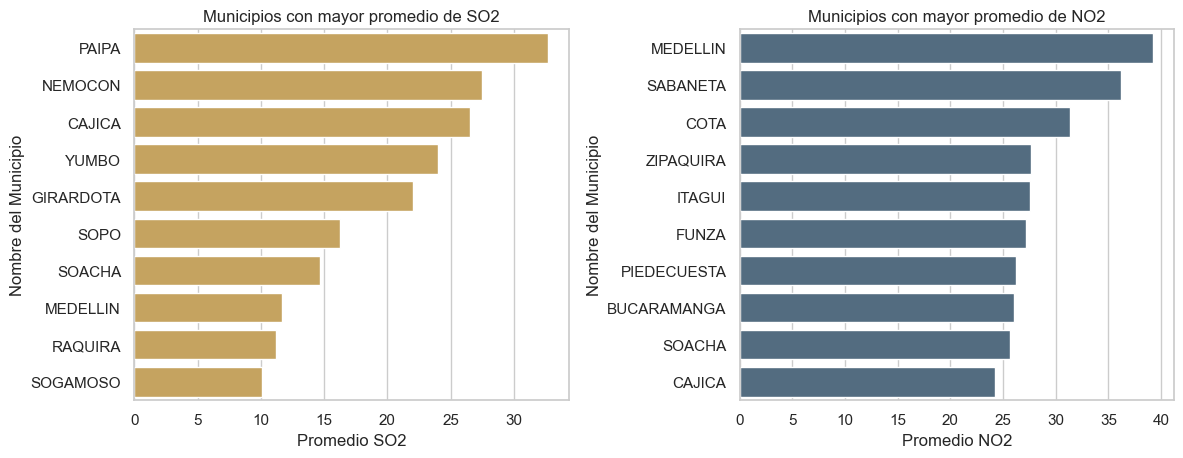

In [11]:
# ---Calculamos el promedio de SO2 por Municipio en Colombia---

promedio_so2 = df_contaminantes[df_contaminantes['Variable']=='SO2'].groupby('Nombre del Municipio')['Promedio'].mean().reset_index()
promedio_so2 = promedio_so2.rename(columns={"Promedio": "Promedio SO2"}) # Reenombramos la columna Promedio a Promedio SO2
promedio_so2 = promedio_so2.sort_values(by='Promedio SO2', ascending = False)  # Ordenamos nuestros datos de mayor a menor
promedio_so2 = promedio_so2[promedio_so2["Promedio SO2"] > 10] # Filtrar municipios con promedio > 10

# ---Calculamos el promedio de NO2 por Municipio en Colombia---

promedio_no2 = df_contaminantes[df_contaminantes['Variable']=='NO2'].groupby('Nombre del Municipio')['Promedio'].mean().reset_index()
promedio_no2 = promedio_no2.rename(columns={"Promedio": "Promedio NO2"}) # Reenombramos la columna Promedio a Promedio NO2
promedio_no2 = promedio_no2.sort_values(by='Promedio NO2', ascending = False)  # Ordenamos nuestros datos de mayor a menor
promedio_no2 = promedio_no2[promedio_no2["Promedio NO2"] > 24.2] # Filtrar municipios con promedio > 24.2

# Crear una figura y ejes para los subplots
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.barplot(data = promedio_so2, x = 'Promedio SO2', y = 'Nombre del Municipio', ax = axes1[0], color="#D6A84F")
sns.barplot(data = promedio_no2, x='Promedio NO2', y = 'Nombre del Municipio', ax=axes1[1], color='#4B6D88')

# Añadir títulos y etiquetas a los subplots
axes1[0].set_title('Municipios con mayor promedio de SO2')
axes1[1].set_title('Municipios con mayor promedio de NO2')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Aunque se podría esperar que los municipios con mayor actividad industrial presentaran los niveles más altos de SO₂ y NO₂, el análisis muestra un patrón distinto. **En el caso del SO₂, los promedios más altos se registran en Paipa, Nemocón y Cajicá, mientras que para el NO₂ destacan Medellín, Sabaneta y Cota**. Este hallazgo sugiere que otros factores —como el tráfico vehicular, los procesos urbanos, las condiciones meteorológicas locales o incluso fuentes puntuales no industriales— pueden estar influyendo significativamente en los niveles de estos contaminantes. Por ejemplo, la quema de carbón en termoeléctricas (como en Paipa), la congestión vial (como en Medellín y su área metropolitana), o la topografía de los valles cerrados pueden agravar la acumulación de contaminantes incluso en zonas no eminentemente industriales.

### ¿El porcentaje de excedencias ha mejorado?

In [12]:
import plotly.express as px

#Agrupamos por año y calculamos el promedio general de excedencias, sin importar el contaminante
excedencias_nacionales = df_contaminantes.groupby('Year')['Porcentaje excedencias limite actual'].mean().reset_index()

# Graficamos los porcentajes de excedencias por año, sin importar el contaminante
px.line(excedencias_nacionales, x = 'Year', y = 'Porcentaje excedencias limite actual',
        title = 'Tendencia nacional de % de excedencias (2011–2022)', template = 'plotly_white')

Contrario a lo esperado, **el año 2020 —en medio de las restricciones por la pandemia de COVID-19— fue el de mayor porcentaje de excedencias a nivel nacional (5.33%)**. Este hallazgo contrasta con la narrativa global de mejoría ambiental durante los confinamientos, lo que sugiere la influencia de otros factores como condiciones meteorológicas desfavorables, continuidad de actividades industriales esenciales, y posible aumento en el uso de combustibles domésticos. Esto refuerza la idea de que la calidad del aire no depende únicamente del tránsito vehicular, sino de un conjunto complejo de variables urbanas, económicas y climáticas.

In [13]:
#Agrupamos por año y calculamos el promedio general de excedencias por departamento, sin importar el contaminante
excedencias_por_dep = df_contaminantes.groupby(['Year', 'Nombre del Departamento'])['Porcentaje excedencias limite actual'].mean().reset_index()

# Graficamos los porcentajes de excedencias por año y departamento, sin importar el contaminante
lista_municipios = excedencias_por_dep['Nombre del Departamento'].unique()
grafica = excedencias_por_dep.query("`Nombre del Departamento` in @lista_municipios")
fig = px.line(grafica, x="Year", y="Porcentaje excedencias limite actual", color='Nombre del Departamento', template='plotly_white')
fig.show()

El comportamiento por departamento refuerza el hallazgo nacional: **varias regiones experimentaron en 2020 sus valores más altos de excedencia**, incluso por encima de años como 2016, que previamente había mostrado señales de deterioro en la calidad del aire. Este patrón se evidenció en:
- **Cundinamarca**, que alcanzó su pico en 2020 con 5.10%, superando los valores registrados en 2013 (2.29%) y 2019 (4.59%).
- **Cesar**, con un aumento hasta 5.82% en 2020, luego de picos menores en 2012 (2.78%) y 2016 (3.05%).
- **Santander** y **Magdalena**, con un alarmante 11% de días en excedencia en 2020, sin antecedentes similares en años previos.
- **Antioquia**, que también experimentó su mayor valor ese año (5.33%) a pesar de un comportamiento más moderado en años anteriores.
- **Valle del Cauca**, con un repunte en 2019 (7%) que dio paso a una estabilización, aunque el nivel en 2020 siguió siendo alto.
- **Risaralda**, aunque tuvo su pico en 2018 (6.34%), no presentó mejoras destacables hasta después del 2020.  

En contraste, departamentos como **Huila**, **Tolima** y **Quindío** se mantuvieron en 0% de excedencias a lo largo de todo el periodo 2011–2022, lo cual puede responder a factores estructurales, menor presión urbana o posibles vacíos de monitoreo.  

Estos resultados evidencian que, aunque las dinámicas nacionales pueden sugerir un comportamiento agregado homogéneo, **el impacto real varió significativamente según las condiciones locales de cada territorio**. La presencia de fuentes fijas (industria, minería), sumada a condiciones atmosféricas desfavorables en ciertas zonas, influyó de forma dispar en el comportamiento departamental de las excedencias. Además, la mejora observada entre 2021 y 2022 en la mayoría de los departamentos sugiere un cambio positivo, aunque no necesariamente sostenido o estructural.

### ¿Hay correlación entre contaminantes atmosfericos?

In [14]:
# Vamos a probar si hay relación entre nuestros contaminantes atmosfericos 

# Reescribimos nuestros datos (Creamos un dataset de solo las columnas que usaremos y los agrupamos por departamento y variables)
contaminantes_y_variables = df_dep[['Nombre del Departamento', 'Variable', 'Promedio']].groupby(['Nombre del Departamento', 
                                                                                                  'Variable'])['Promedio'].mean().reset_index()

# Obtenemos las variables unicas presentadas en los distintos departamentos
variable_contaminantes = contaminantes_y_variables['Variable'].unique()

# Creamos un dataset base con los municipios unicos
df_corr_dep = contaminantes_y_variables[['Nombre del Departamento']].drop_duplicates()

# Iterar sobre cada variable y unirla al DataFrame base
for var in variable_contaminantes:
    variables = contaminantes_y_variables[contaminantes_y_variables['Variable'] == var].copy()
    variables.rename(columns={"Promedio": var}, inplace=True)
    variables.drop(columns=["Variable"], inplace=True)
    df_corr_dep = pd.merge(df_corr_dep, variables, on='Nombre del Departamento', how='left')

# Eliminamos las columnas a no usar
df_corr = df_corr_dep.drop(['Nombre del Departamento', 'DViento', 'HAire', 'HAire10', 'P', 'RGlobal', 
                            'TAire', 'TAire10', 'TAire2', 'VViento', 'RUVb', 'HAire2', 'PLiquida'], axis=1)

# Visualizamos nuestra nueva tabla para evaluar las correlaciones
df_corr

,CO,NO,NO2,O3,PM10,PM2.5,PST,SO2
0,1157.300000,30.800000,31.011111,29.387363,38.966667,19.708571,71.310000,15.521212
1,602.522222,4.677778,16.741667,20.066667,39.190909,17.179688,27.650000,13.793000
2,1031.600000,NaN,NaN,28.200000,26.587037,15.860000,76.952941,6.250000
3,NaN,NaN,NaN,NaN,37.144500,14.650000,81.827536,NaN
4,666.345000,34.233333,20.771028,21.333333,37.768571,15.785135,68.006522,11.775926
5,NaN,NaN,NaN,NaN,18.931818,13.900000,NaN,NaN
6,NaN,NaN,NaN,NaN,35.993284,10.500000,75.788000,NaN
7,470.168182,2.933333,9.144444,31.325000,38.074590,12.208000,70.421277,5.913333
8,NaN,NaN,NaN,NaN,19.878947,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,28.797826,16.700000,30.750000,NaN


Hay demasiados valores no nulos por ende no podemos eliminarlos, dado que puede afectar nuestros resultados. En este caso, aplicaremos el modelo predictivo KNN para reemplazar los valores nulos y evitar sesgos en nuestros resultados

In [15]:
from sklearn.impute import KNNImputer

# Crear el imputador con 3 vecinos
imputer = KNNImputer(n_neighbors = 3)

# Aplicarlo al DataFrame (solo reemplaza NaN)
df_corr.iloc[:, :] = imputer.fit_transform(df_corr)

# Evaluamos si existe alguna correlacion entre nuestros contaminantes

import plotly.graph_objects as go

contaminantes = ["CO", "NO", "NO2", "O3", "PM10", "PM2.5", "PST", "SO2"]
corr_matrix = df_corr[contaminantes].corr(method="pearson")

heatmap = go.Figure(data=go.Heatmap(z=corr_matrix.values, x=corr_matrix.columns, y=corr_matrix.index, colorscale="RdBu", 
                                    zmin=-1, zmax=1, colorbar=dict(title="Correlación")))

heatmap.update_layout(title="Mapa de calor de correlación entre contaminantes", xaxis_nticks=36, height=700, width=700)

heatmap.show()

El mapa de calor revela correlaciones positivas notables entre varios contaminantes atmosféricos, lo que sugiere posibles fuentes comunes de emisión o relaciones químicas entre ellos. Destacan especialmente:

- **NO** y **NO2** con una correlación fuerte de 0.78, reflejando su vínculo directo en procesos de oxidación.  
- **CO** y **NO2** con 0.61, indicando probablemente una fuente común asociada a la combustión vehicular o industrial.  
- **PM2.5** y **SO2** también con 0.67, lo cual es coherente con la formación secundaria de partículas finas a partir de gases precursores como el dióxido de azufre.  
- **O3** y **PST** con 0.60, una relación menos esperada que podría estar influenciada por condiciones atmosféricas compartidas o reacciones fotoquímicas indirectas.

### ¿Hay correlación entre contaminantes y variables meteorológicas? 

In [16]:
# Eliminamos las columnas a no usar de nuestros datos ajustados anteriormente
df_corr1 = df_corr_dep.drop(['Nombre del Departamento'], axis=1)

# Imputamos los datos nulos con KNN
df_corr1.iloc[:, :] = imputer.fit_transform(df_corr1)

# Definimos nuestras variables metereologicas y contaminantes
contaminantes1 = ['CO', 'DViento', 'HAire', 'HAire10', 'HAire2', 'NO', 'NO2', 'O3', 'P', 'PLiquida', 'PM10' , 'PM2.5', 'PST', 
                  'RGlobal', 'SO2', 'TAire', 'TAire10', 'TAire2', 'VViento', 'RUVb']

# Hallamos la correlacion basada en el metodo pearson
corr_matrix1 = df_corr1[contaminantes1].corr(method="pearson")

# Reemplazamos valores nulos por 0
corr_matrix1 = corr_matrix1.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Grficamos el mapa de calor de acuerdo a las correlaciones obtenidas
heatmap1 = go.Figure(data=go.Heatmap(z=corr_matrix1.values, x=corr_matrix1.columns, y=corr_matrix1.index, colorscale="RdBu", 
                                    zmin=-1, zmax=1, colorbar=dict(title="Correlación")))
heatmap1.update_layout(title="Mapa de calor de correlación entre contaminantes", xaxis_nticks=36, height=700, width=700)
heatmap1.show()

Al analizar la matriz de correlación entre contaminantes atmosféricos y variables meteorológicas, se identificaron **pocas relaciones directas** entre ambos grupos. De manera destacada:  

- **Presión atmosférica (P)** presentó correlaciones **negativas fuertes** con:
	- **Monóxido de carbono (CO)**: -0.81
	- **Dióxido de nitrógeno (NO2)**: -0.87  

Esto sugiere que menores niveles de presión podrían estar asociados a mayores concentraciones de estos contaminantes, posiblemente por condiciones de estabilidad atmosférica que reducen la dispersión vertical de los gases.  

En contraste, las demás correlaciones significativas se observaron entre variables **exclusivamente meteorológicas**, como:  
- **Precipitación líquida (PLiquida) y humedad a 2 m (HAire2)**: 0.96
- **Velocidad del viento (VViento) y humedad a 10 m (HAire10)**: 0.78
- **Presión (P) y humedad a 2 m (HAire2)**: 0.75
- **Presión (P) y dirección del viento (DViento)**: -0.70
- **Radiación ultravioleta (RUVb) y temperatura del aire a 10 m (TAire10)**: -0.72  

Estas relaciones evidencian la coherencia interna de las variables meteorológicas entre sí, reflejando sus dinámicas físicas naturales, pero no necesariamente una influencia directa sobre las concentraciones de contaminantes en este conjunto de datos.


### Conclusiones

Este proyecto realizó un análisis detallado de la calidad del aire en Colombia entre los años 2011 y 2022, partiendo de una base de datos con 13,866 observaciones y 18 variables, correspondientes a registros ambientales de 33 departamentos. Como parte de la depuración, Bogotá D.C. fue reclasificada dentro del departamento de Cundinamarca, y se filtraron únicamente aquellos departamentos con información completa a lo largo del periodo analizado. De este modo, se consolidó un conjunto de datos representativo que abarca 13 departamentos.  

El análisis evolutivo de los contaminantes mostró que, salvo por una caída abrupta del PST en 2018 y su posterior desaparición en 2019 —que podría responder a cambios metodológicos o administrativos—, la mayoría de los contaminantes regulados por la Ley 2254 de 2017 (PM10, PM2.5, NO₂, SO₂ y PST) mantuvieron una tendencia estable en los últimos años. Entre ellos, destacó el año 2016, cuando se evidenciaron picos de concentración en PM10, PM2.5, SO₂ y PST, aunque en departamentos distintos, lo que sugiere la existencia de causas locales específicas detrás de cada episodio de contaminación. Por su parte, el NO₂ alcanzó su punto más alto en 2011 y se mantuvo relativamente estable en los años posteriores.  

El cumplimiento de la regulación mostró que, aunque la mayoría de los registros se mantuvieron por debajo de los valores límites establecidos, el **PM2.5 superó el umbral legal de 25 μg/m³ en 2016**, lo que indica la ocurrencia de un evento crítico de contaminación. No obstante, al revisar los estadísticos de tendencia central, se encontró que la mediana era menos sensible a eventos extremos, permitiendo una caracterización más representativa del comportamiento típico de los contaminantes. A nivel departamental, ese mismo año se presentaron eventos de concentración elevados por región: La Guajira, Boyacá y Valle del Cauca destacaron por altos niveles de PM10; Cesar y Antioquia por concentraciones elevadas de PM2.5; Cundinamarca por una anomalía en el PST; y Boyacá por registrar el valor más alto de SO₂.  

Cuando se exploró la relación entre actividad industrial y niveles de NO₂ y SO₂, los resultados fueron contraintuitivos: los valores más altos de SO₂ se observaron en municipios como Paipa, Nemocón y Cajicá, y los de NO₂ en Medellín, Sabaneta y Cota. Esto sugiere que factores como la congestión vehicular, la quema de carbón en termoeléctricas y la topografía urbana pueden tener un papel tan relevante —o incluso mayor— que la actividad industrial tradicional.  

Un hallazgo particularmente interesante fue que, si bien el año 2016 presentó los picos más altos de concentración promedio, el porcentaje de reportes que superaron los límites establecidos fue más alto en 2020 (5.33 %). Este año coincide con el periodo de la pandemia por COVID-19, cuando se esperaba una reducción generalizada de emisiones. Esto indica que, aunque los promedios bajaron, la frecuencia relativa de eventos de alta contaminación fue mayor, probablemente asociada a condiciones meteorológicas atípicas o una disminución en la dispersión atmosférica.  

En el análisis de correlaciones entre contaminantes, se identificaron asociaciones relevantes desde el punto de vista químico y de fuente de emisión: NO–NO₂ (0.78), CO–NO₂ (0.61), PM2.5–SO₂ (0.67) y una relación menos esperada entre O₃–PST (0.60). Estas relaciones sugieren dinámicas de conversión atmosférica y coexistencia de contaminantes primarios con secundarios, además de posibles efectos compartidos de condiciones meteorológicas.  

Finalmente, al relacionar los contaminantes con variables meteorológicas, se hallaron pocas correlaciones directas fuertes. Las más destacadas fueron las correlaciones negativas entre **presión atmosférica y CO (-0.81)**, y **presión atmosférica y NO₂ (-0.87)**, lo que sugiere que condiciones de baja presión —asociadas a una atmósfera más estable y con menor capacidad de dispersión— podrían favorecer la acumulación de estos gases. El resto de las correlaciones significativas se dio principalmente entre variables meteorológicas entre sí, lo que evidencia la coherencia interna de las mediciones ambientales.  

En conjunto, los hallazgos de este proyecto permiten entender mejor la evolución y comportamiento conjunto de los contaminantes del aire en Colombia, identificando años críticos, regiones prioritarias y posibles dinámicas subyacentes. Este trabajo puede servir como insumo para la toma de decisiones, ajustes en la política ambiental y futuras investigaciones que incorporen más dimensiones espaciales y de salud pública.